In [51]:
import requests
import contextily as ctx
import matplotlib.pyplot as plt
plt.style.use("bmh")
import json
import re
from pprint import pprint

In [17]:
from pathlib import Path
import os
import pandas as pd

with open(Path(os.getcwd()) / 'test.csv', 'wb') as f:
    f.write(result.content) 

pd.read_csv()
a



In [84]:
requests.get("https://macrostrat.org/api/geologic_units/map").json()

{'success': {'v': 2,
  'license': 'CC-BY 4.0',
  'description': 'Geologic map units from various data sources',
  'options': {'parameters': {'scale': "Can be 'small', 'medium', or 'large'",
    'map_id': 'integer, one or more polygon map_ids to search for',
    'lat': 'A valid latitude in decimal degrees',
    'lng': 'A valid longitude in decimal degrees',
    'strat_name_id': 'integer, one or more valid strat_name_ids from /defs/strat_names',
    'unit_id': 'integer, one or more valid unit_ids from /units',
    'format': 'Desired output format'},
   'output_formats': ['json',
    'csv',
    'geojson',
    'geojson_bare',
    'topojson',
    'topojson_bare'],
   'examples': ['/api/v2/geologic_units/map?lat=43&lng=-89.3'],
   'fields': {'map_id': '',
    'source_id': 'integer, unique Burwell source',
    'name': 'text, the name of the entity',
    'strat_name': 'text, informal unit name',
    'lith': 'text, specific lithology, see /defs/lithologies',
    'descrip': 'text, description of

In [113]:
import geopandas as gpd
# requests.get("https://macrostrat.org/api/geologic_units/map/").text
# link =       "https://macrostrat.org/api/geologic_units/map"
# requests.get("https://macrostrat.org/api/").text
# requests.get("https://macrostrat.org/api/grids/latitude").json()
# requests.get("https://macrostrat.org/api/geologic_units/map").json()
# requests.get("https://macrostrat.org/api/grids/longitude").json()
request_params = {
    "lat": 50.5072,
    "lng": 0.1276,
    "format": "geojson_bare",
    }
res = requests.get("https://macrostrat.org/api/geologic_units/map", params=request_params).content
res = StringIO(str(res, 'utf-8'))
# gdf = pd.read_csv(res)
gdf = gpd.read_file(res)
gdf.head()

DriverError: '/vsimem/c64cc1e96a9940c78f4b3c093d017b74' not recognized as a supported file format.

In [98]:
gdf.loc[0]

map_id                                                     3156265
source_id                                                      147
name                                              Eocene claystone
strat_name                                                        
lith                                                     claystone
descrip                                                           
comments                                                          
t_int_id                                                        24
t_int_age                                                     33.9
t_int_name                                                  Eocene
b_int_id                                                        24
b_int_age                                                       56
b_int_name                                                  Eocene
color                                                      #FDB46C
t_age                                                         

In [35]:
result = requests.get("https://macrostrat.org/api/v2/grids/latitude?lngSpacing=5&latSpacing=12&format=geojson_bare")
# result

In [72]:
requests.get("https://macrostrat.org/api/formulas").json()

{'error': {'message': '404: Page not found'}}

In [39]:
with open(Path(os.getcwd()) / "test.geojson", "wb") as f:
    f.write(result.content)

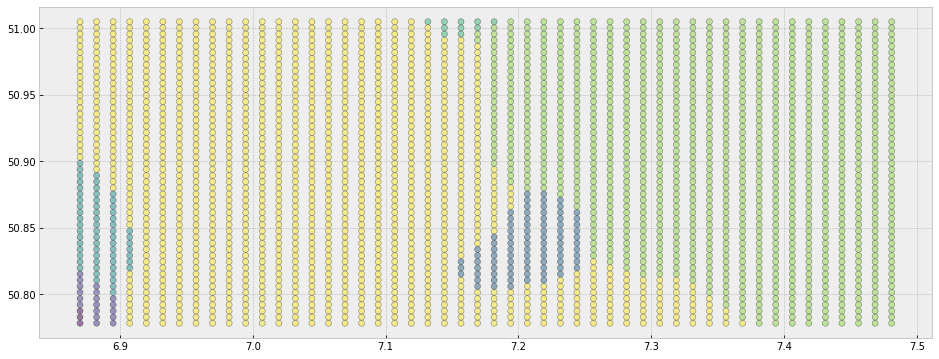

In [66]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
plt.style.use("bmh")
import numpy as np
from io import StringIO
import requests
import pandas as pd
from tqdm import tqdm

def get_lithography(grid):
    """
    Retrieves lithology for passed grid from macrostrat.org/api
    """    
    api = "https://macrostrat.org/api/geologic_units/map"
    request_params = dict(
        format="geojson_bare"
    )


    for idx, row in grid.iterrows():
        
        if not grid.loc[idx, "lith"] == -1:
            continue        

        request_params.update(lat=row.lat)
        request_params.update(lng=row.lng)

        result = requests.get(api, params=request_params).content
        result = StringIO(str(result, "utf-8"))
        result = gpd.read_file(result)

        try:
            result = result.loc[result["lith"].str.contains("Major")].iloc[0] 
        except IndexError:        
            result = result.iloc[0]

        polygon = result.loc["geometry"]
        lith = result.loc["lith"]

        assign_mask = (
            grid["geometry"].within(polygon)).multiply(
            grid["lith"] == -1
        )
        grid.loc[assign_mask, "lith"] = lith

    all_liths = list(set(grid["lith"]))
    grid["lith"] = grid["lith"].apply(lambda entry: all_liths.index(entry))

    return grid, all_liths


if __name__ == "__main__":

    lng1 = 6.870
    lng2 = 7.481
    lat1 = 50.778
    lat2 = 51.005
    steps = 50

    grid_x = np.linspace(lng1, lng2, steps)
    grid_y = np.linspace(lat1, lat2, steps)

    grid_x, grid_y = np.meshgrid(grid_x, grid_y)

    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
        grid_x.flatten(), grid_y.flatten()))

    gdf["lng"] = grid_x.flatten()
    gdf["lat"] = grid_y.flatten()
    gdf["lith"] = (np.ones(len(gdf)) * (-1)).astype("int")

    result, all_liths = get_lithography(gdf)

In [75]:
a = dict(b=2)

try:
    print(a['b'])
    print(lf)
except KeyError:
    print("nope")
except NameError:
    print('other nope')

2
other nope


{'Major:{sandstone}, Minor{claystone,siltstone,lignite}': 0, 'Major:{claystone}, Minor{siltstone,sandstone,lignite}': 1, '': 2, 'Major:{sand}, Minor{clay,coal,limestone}': 3, 'Major:{claystone}, Minor{limestone,siltstone,dolomite/dolostone}': 4, 'Major:{quartzite}, Minor{sandstone,shale/slate}': 5, 'Major:{clay}, Minor{silt,sand,gravel}': 6}


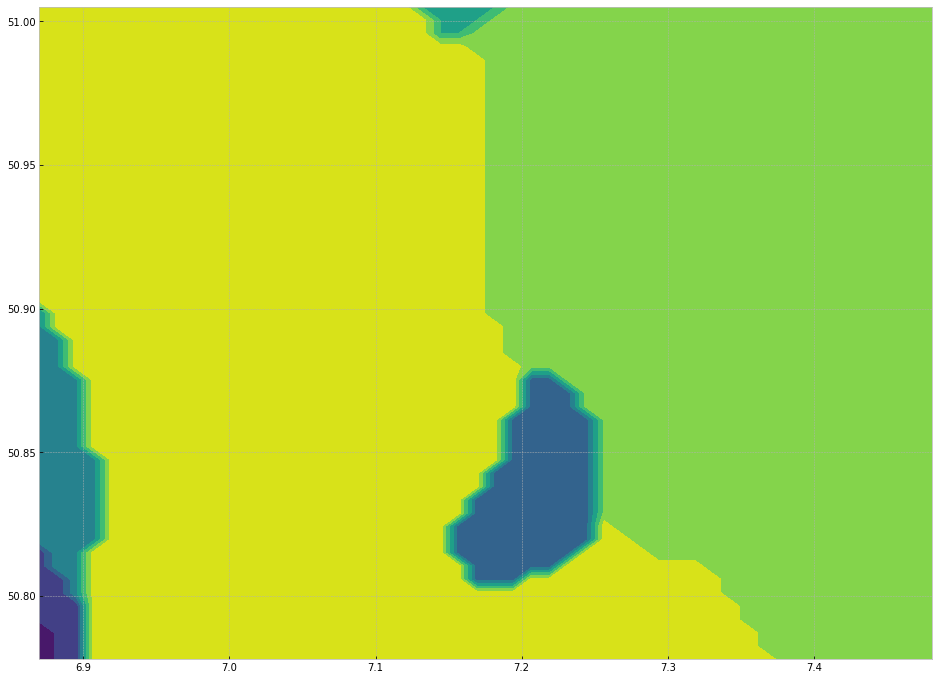

In [67]:
print({item: key for key, item in enumerate(all_liths)})

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.contourf(grid_x, grid_y, result["lith"].to_numpy().reshape(grid_x.shape))

plt.show()

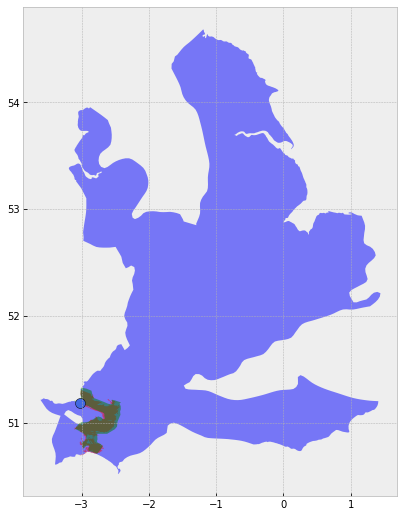

sedimentary rocks
mudstone, siltstone, limestone and sandstone
claystone


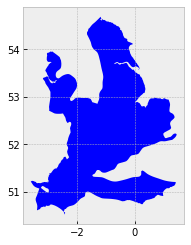

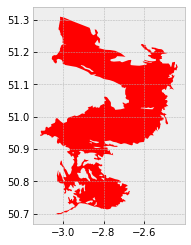

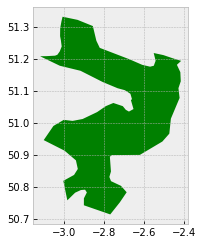

In [22]:
api = "https://macrostrat.org/api/geologic_units/map"
request_params = dict(
    format="geojson_bare"
)

lat = 51.19031
lng = -3.024668

request_params.update(lat=lat)
request_params.update(lng=lng)

single = requests.get(api, params=request_params).content
single = StringIO(str(single, "utf-8"))

single = gpd.read_file(single)

colors = ['b', 'r', 'g', 'y', 'magenta', 'seagreen']

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
for color, i in zip(colors, range(len(single))):
    single[i:i+1].plot(ax=ax, alpha=0.5, color=color, label=i)

ax.scatter([lng], [lat], 
            edgecolor='k', 
            color='royalblue',
            s=100, 
           )
plt.show()

for color, i in zip(colors, range(len(single))):
    print(single.loc[i, 'lith'])
    single[i:i+1].plot(color=color)